# Logistic Regression - Loan Eligibility Prediction

### Context
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. \
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Aim of the Analysis
The assignment is to create a logistic regression model for the dataset which could be used to identify the customers that are eligible and uneligible for the loan. Calculate relevant metrix for the model, such as accuracy, precision, log loss and score.

### About the Dataset
Source: [KaggleTrain](https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data) \
CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

## 1. Extract and transform the data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# read data
df = pd.read_csv('Loan_Data.csv', sep=',')
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [121]:
#check the number of missing values
nan_count = df.isna().sum()
nan_count

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
#check the number of duplicates
dups = df.duplicated()
dups.sum()

0

In [123]:
#drop unnecessary column Loan ID
df.drop(df.columns[[0]], axis=1, inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
for col in df:
    print(df[col].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  243

In [125]:

#replace no and yes values consistently with 0 and 1
 
df['Gender'].replace(['Male','Female'], [0,1], inplace=True)
df['Married'].replace(['Yes', 'No'], [1,0], inplace=True)
df['Dependents'].replace(['0','1','2','3+'], [0,1,2,3], inplace=True)
df['Education'].replace(['Graduate', 'Not Graduate'], [1,0], inplace=True)
df['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0,1,2], inplace=True)
df['Loan_Status'].replace(['N', 'Y'], [0,1], inplace=True)

for col in df:
    print(df[col].unique())

[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1.  2.  3. nan]
[1 0]
[ 0.  1. nan]
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


## 2. Check the value distribution of the dataset

In [127]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.186356,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.087948,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Loan_Status'}>]], dtype=object)

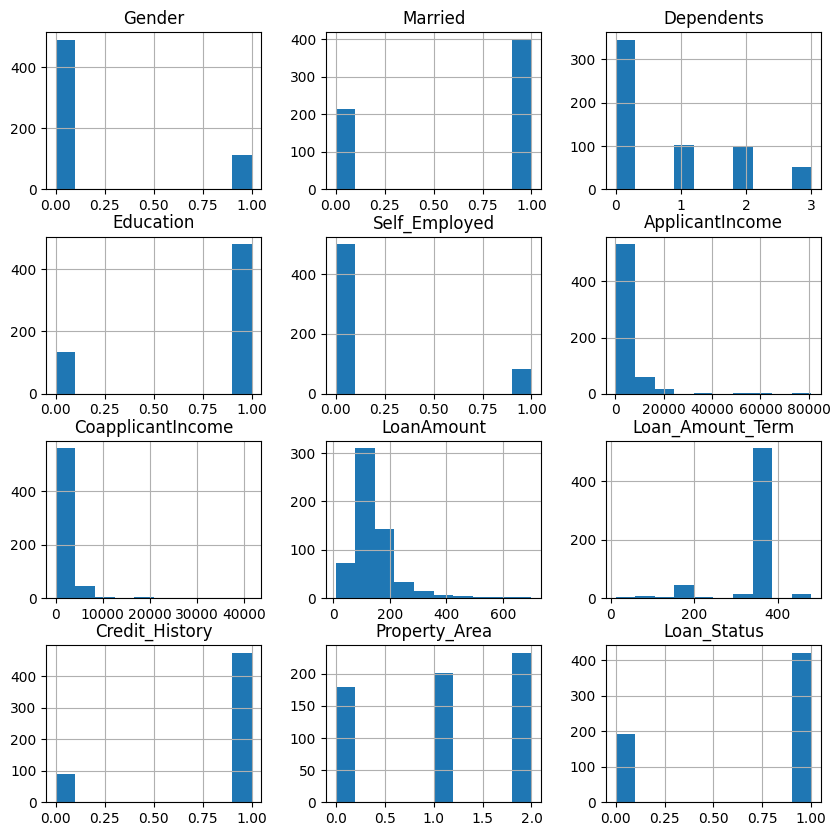

In [128]:
df.hist(figsize=[10, 10])

## 3. Check the correlations and p-values of the variables

In [129]:
#pearson p-values of the variables
from scipy.stats import pearsonr
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [130]:
calculate_pvalues(df) 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,0.0,0.0,0.0,0.2279,0.815,0.1862,0.0397,0.01,0.069,0.7017,0.006,0.6271
Married,0.0,0.0,0.0,0.7257,0.9634,0.2051,0.0547,0.0003,0.0111,0.9175,0.9067,0.0273
Dependents,0.0,0.0,0.0,0.1481,0.1688,0.0036,0.5055,0.0001,0.015,0.2414,0.8884,0.8685
Education,0.2279,0.7257,0.1481,0.0,0.7665,0.0005,0.1231,0.0,0.0538,0.0521,0.0985,0.0334
Self_Employed,0.815,0.9634,0.1688,0.7665,0.0,0.0007,0.7883,0.0033,0.3775,0.9284,0.8146,0.9558
ApplicantIncome,0.1862,0.2051,0.0036,0.0005,0.0007,0.0,0.0038,0.0,0.2679,0.7273,0.6684,0.9073
CoapplicantIncome,0.0397,0.0547,0.5055,0.1231,0.7883,0.0038,0.0,0.0,0.1429,0.9611,0.6369,0.1429
LoanAmount,0.01,0.0003,0.0001,0.0,0.0033,0.0,0.0,0.0,0.3438,0.8446,0.4747,0.3647
Loan_Amount_Term,0.069,0.0111,0.015,0.0538,0.3775,0.2679,0.1429,0.3438,0.0,0.9726,0.6687,0.6031
Credit_History,0.7017,0.9175,0.2414,0.0521,0.9284,0.7273,0.9611,0.8446,0.9726,0.0,0.3817,0.0


In [131]:
#p-values of the correlations
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.0***,-0.37***,-0.18***,0.05,0.01,-0.05,-0.08*,-0.11*,0.08,-0.02,0.11**,-0.02
Married,-0.37***,1.0***,0.34***,-0.01,0.0,0.05,0.08,0.15***,-0.1*,0.0,0.0,0.09*
Dependents,-0.18***,0.34***,1.0***,-0.06,0.06,0.12**,0.03,0.16***,-0.1*,-0.05,0.01,0.01
Education,0.05,-0.01,-0.06,1.0***,0.01,0.14***,0.06,0.17***,0.08,0.08,0.07,0.09*
Self_Employed,0.01,0.0,0.06,0.01,1.0***,0.14***,-0.01,0.12**,-0.04,0.0,-0.01,-0.0
ApplicantIncome,-0.05,0.05,0.12**,0.14***,0.14***,1.0***,-0.12**,0.57***,-0.05,-0.01,-0.02,-0.0
CoapplicantIncome,-0.08*,0.08,0.03,0.06,-0.01,-0.12**,1.0***,0.19***,-0.06,-0.0,-0.02,-0.06
LoanAmount,-0.11*,0.15***,0.16***,0.17***,0.12**,0.57***,0.19***,1.0***,0.04,-0.01,-0.03,-0.04
Loan_Amount_Term,0.08,-0.1*,-0.1*,0.08,-0.04,-0.05,-0.06,0.04,1.0***,0.0,0.02,-0.02
Credit_History,-0.02,0.0,-0.05,0.08,0.0,-0.01,-0.0,-0.01,0.0,1.0***,0.04,0.56***


<Axes: >

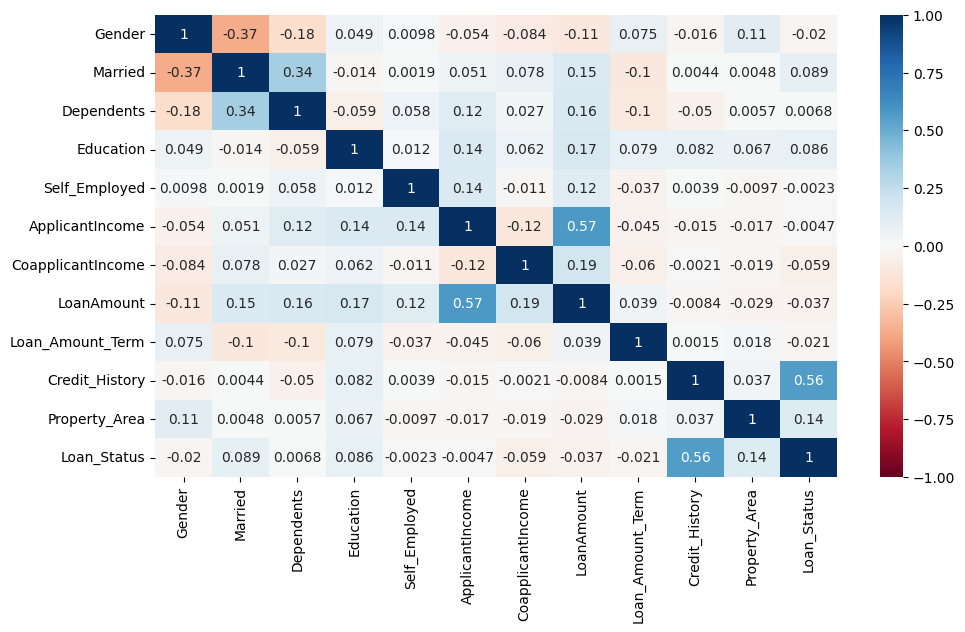

In [132]:
corr_matrix = df.corr()
plt.figure(figsize=(11,6))
sns.heatmap(corr_matrix,vmin=-1.0,vmax=1.0, cmap='RdBu', annot=True)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#drop columns with non-significant p-value
df.drop(df.columns[[0,2,4,5,6,7,8]], axis=1, inplace=True)
df.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [ ]:
#delete the missing values
df = df.dropna()
df.shape

(561, 5)

In [ ]:
#change all value types to integers
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 613
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Married         561 non-null    int32
 1   Education       561 non-null    int32
 2   Credit_History  561 non-null    int32
 3   Property_Area   561 non-null    int32
 4   Loan_Status     561 non-null    int32
dtypes: int32(5)
memory usage: 15.3 KB


## 4. Divide the data and create the model

In [ ]:
#select the independent variables and the dependant variable
X = df.iloc[:,:4]
Y = df.iloc[:,4:5]
print(X)

     Married  Education  Credit_History  Property_Area
0          0          1               1              1
1          1          1               1              0
2          1          1               1              1
3          1          0               1              1
4          0          1               1              1
..       ...        ...             ...            ...
609        0          1               1              0
610        1          1               1              0
611        1          1               1              1
612        1          1               1              1
613        0          1               0              2

[561 rows x 4 columns]


In [ ]:
print(Y)

     Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
609            1
610            1
611            1
612            1
613            0

[561 rows x 1 columns]


In [ ]:
#divide the data to the test set and train set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print('The shape of the training data:')
print(X_train.shape)
print(y_train.shape)
print('The shape of the test data:')
print(X_test.shape)
print(y_test.shape)

The shape of the training data:
(448, 4)
(448, 1)
The shape of the test data:
(113, 4)
(113, 1)


In [ ]:
reg = LogisticRegression(random_state=42)
reg.fit(X_train,y_train)

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[0.62132145 0.06013928 3.45147867 0.45366252]]
Intercept:  [-3.01078932]


## 4. Create the Confusion Matrix

In [ ]:
#calculate predictions from the test set
y_pred = reg.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[15 21]
 [ 2 75]]


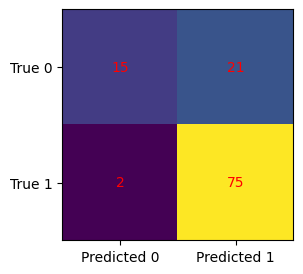

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0', 'True 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## 5. Compute precision, recall, F-measure and support
To quote from [Scikit Learn](https://scikit-learn.org/stable/index.html):

- The precision is the ability of the classifier to not label a sample as positive if it is negative.
- The recall is the ability of the classifier to find all the positive samples.
- The F-beta score is a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
- The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
- The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy calculated from the training set = %.3f" % (accuracy2)) 

print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

Accuracy calculated from the training set = 0.796
              precision    recall  f1-score   support

          no       0.88      0.42      0.57        36
         yes       0.78      0.97      0.87        77

    accuracy                           0.80       113
   macro avg       0.83      0.70      0.72       113
weighted avg       0.81      0.80      0.77       113



Interpretation:
- The model's precision is high when predicting both no and yes values of the dependant variable.
- However, the model poorly detects the no values of the variable.

## 6. Analyze the importance of each independent variable

In [ ]:
cof=pd.DataFrame(reg.coef_*100, columns = X.columns).T
cof[0].sort_values(ascending=False)

Credit_History    345.147867
Married            62.132145
Property_Area      45.366252
Education           6.013928
Name: 0, dtype: float64

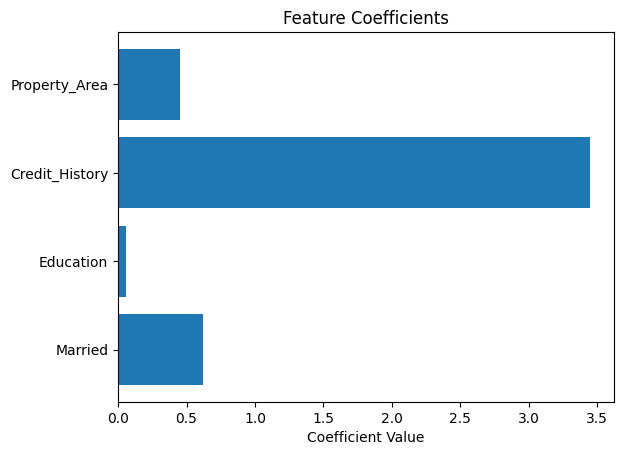

In [ ]:
coef = reg.coef_[0]
feature_names = ['Married', 'Education', 'Credit_History', 'Property_Area']
plt.barh(feature_names, coef)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

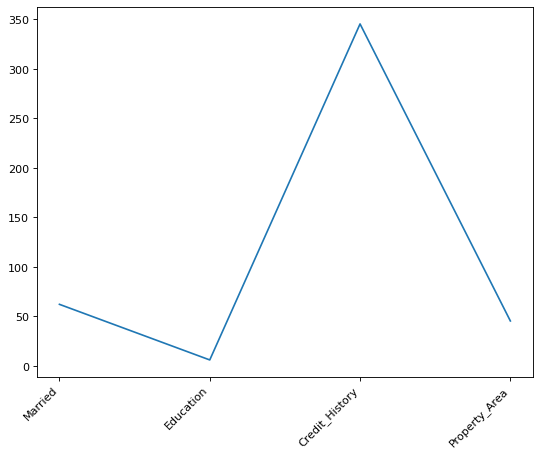

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(cof)
plt.xticks(rotation=45, ha='right')
plt.show()

## 6. Cross-validation and calculating the predictions

In [ ]:
k = 10
scores = cross_val_score(estimator=reg,
                        X=X,
                        y=Y,
                        scoring="accuracy",
                        cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.80701754 0.85714286 0.76785714 0.76785714 0.78571429 0.78571429
 0.85714286 0.85714286 0.80357143 0.85714286]
Accuracy calculated using 10-fold cross validation = 0.815


In [ ]:
y_pred_proba = reg.predict_proba(X_test)[:,1]
y_pred_proba

array([0.79380482, 0.07606964, 0.80347457, 0.80347457, 0.62265404,
       0.74307462, 0.62265404, 0.88385721, 0.72201749, 0.82861066,
       0.08872293, 0.74307462, 0.88385721, 0.81990047, 0.88385721,
       0.75438732, 0.75438732, 0.07194916, 0.62265404, 0.88385721,
       0.72201749, 0.82861066, 0.88385721, 0.08872293, 0.62265404,
       0.62265404, 0.81990047, 0.80347457, 0.72201749, 0.88385721,
       0.13288747, 0.88385721, 0.72201749, 0.19434768, 0.75438732,
       0.04694082, 0.88385721, 0.74307462, 0.82861066, 0.08872293,
       0.19434768, 0.88385721, 0.88385721, 0.88385721, 0.79380482,
       0.75438732, 0.62265404, 0.82861066, 0.88385721, 0.87753976,
       0.88385721, 0.82861066, 0.75438732, 0.88385721, 0.81990047,
       0.19434768, 0.62265404, 0.80347457, 0.11472859, 0.80347457,
       0.88385721, 0.72201749, 0.87753976, 0.72201749, 0.74307462,
       0.08397936, 0.75438732, 0.88385721, 0.62265404, 0.88385721,
       0.88385721, 0.82861066, 0.80347457, 0.62265404, 0.75438

In [ ]:
#put the predictions into dataframe
df_y_prob_pred = pd.DataFrame(y_pred_proba)
df_y_prob_pred

,0
0,0.793805
1,0.076070
2,0.803475
3,0.803475
4,0.622654
...,...
108,0.722017
109,0.722017
110,0.132887
111,0.132887


## 8. Calculate the log loss and score
- [Log-loss](https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a) is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value. Optimal value is below 1.
- [Score](https://www.kaggle.com/discussions/getting-started/27261) is equivalent to R-squared, which is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, df_y_prob_pred)
logloss

0.49439545799405615

In [ ]:
reg.score(X,Y)

0.8146167557932263

## 8. ROC Curve
[The receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve is a common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

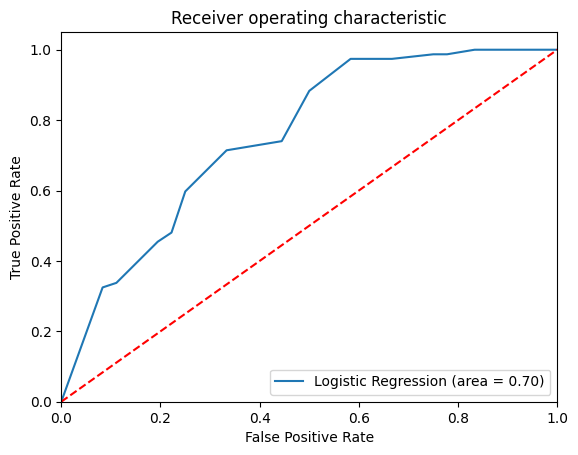

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 9. Create and test the model with standardized values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df))
dfscaled.columns=df.columns[[0,1,2,3,4]]
print(dfscaled)

      Married  Education  Credit_History  Property_Area  Loan_Status
0   -1.348738   0.524404        0.434234      -0.108933     0.684534
1    0.741434   0.524404        0.434234      -1.331158    -1.460848
2    0.741434   0.524404        0.434234      -0.108933     0.684534
3    0.741434  -1.906925        0.434234      -0.108933     0.684534
4   -1.348738   0.524404        0.434234      -0.108933     0.684534
..        ...        ...             ...            ...          ...
556 -1.348738   0.524404        0.434234      -1.331158     0.684534
557  0.741434   0.524404        0.434234      -1.331158     0.684534
558  0.741434   0.524404        0.434234      -0.108933     0.684534
559  0.741434   0.524404        0.434234      -0.108933     0.684534
560 -1.348738   0.524404       -2.302905       1.113292    -1.460848

[561 rows x 5 columns]


In [ ]:
Xscaled = df.iloc[:,:4]
Yscaled = df.iloc[:,4:5]
print(Yscaled)

     Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
609            1
610            1
611            1
612            1
613            0

[561 rows x 1 columns]


In [ ]:
#divide the data to the test set and train set
Xsc_train, Xsc_test, ysc_train, ysc_test = train_test_split(Xscaled,Yscaled, test_size=0.2, random_state=42)

print('The shape of the training data:')
print(Xsc_train.shape)
print(ysc_train.shape)
print('The shape of the test data:')
print(Xsc_test.shape)
print(ysc_test.shape)

The shape of the training data:
(448, 4)
(448, 1)
The shape of the test data:
(113, 4)
(113, 1)


In [ ]:
#fit the scaled values into the model
reg = LogisticRegression()
reg.fit(Xsc_train,ysc_train)

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[0.62132145 0.06013928 3.45147867 0.45366252]]
Intercept:  [-3.01078932]


In [ ]:
#cross-validate
#number of folds
k = 10
scores = cross_val_score(estimator=reg,
                        X=Xscaled,
                        y=Yscaled,
                        scoring="accuracy",
                        cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.80701754 0.85714286 0.76785714 0.76785714 0.78571429 0.78571429
 0.85714286 0.85714286 0.80357143 0.85714286]
Accuracy calculated using 10-fold cross validation = 0.815


In [ ]:
#calculate predictions from the test set
ysc_pred = reg.predict(Xsc_test)

In [ ]:
#calculate the predictions from the scaled training set
ysc_prob_pred = reg.predict_proba(Xsc_test)
ysc_prob_pred

array([[0.20619518, 0.79380482],
       [0.92393036, 0.07606964],
       [0.19652543, 0.80347457],
       [0.19652543, 0.80347457],
       [0.37734596, 0.62265404],
       [0.25692538, 0.74307462],
       [0.37734596, 0.62265404],
       [0.11614279, 0.88385721],
       [0.27798251, 0.72201749],
       [0.17138934, 0.82861066],
       [0.91127707, 0.08872293],
       [0.25692538, 0.74307462],
       [0.11614279, 0.88385721],
       [0.18009953, 0.81990047],
       [0.11614279, 0.88385721],
       [0.24561268, 0.75438732],
       [0.24561268, 0.75438732],
       [0.92805084, 0.07194916],
       [0.37734596, 0.62265404],
       [0.11614279, 0.88385721],
       [0.27798251, 0.72201749],
       [0.17138934, 0.82861066],
       [0.11614279, 0.88385721],
       [0.91127707, 0.08872293],
       [0.37734596, 0.62265404],
       [0.37734596, 0.62265404],
       [0.18009953, 0.81990047],
       [0.19652543, 0.80347457],
       [0.27798251, 0.72201749],
       [0.11614279, 0.88385721],
       [0.

In [ ]:
#put the predictions into dataframe
sc_regdata = pd.DataFrame(ysc_prob_pred)

In [ ]:
cm = confusion_matrix(ysc_test, ysc_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[15 21]
 [ 2 75]]


In [ ]:
accuracy2 = accuracy_score(ysc_test, ysc_pred)
print("Accuracy calculated from the training set = %.3f" % (accuracy2)) 

print(classification_report(ysc_test, ysc_pred, target_names=['no', 'yes']))

Accuracy calculated from the training set = 0.796
              precision    recall  f1-score   support

          no       0.88      0.42      0.57        36
         yes       0.78      0.97      0.87        77

    accuracy                           0.80       113
   macro avg       0.83      0.70      0.72       113
weighted avg       0.81      0.80      0.77       113



Interpretation:
- Standardizing the values does not affect the poor recall of the no values

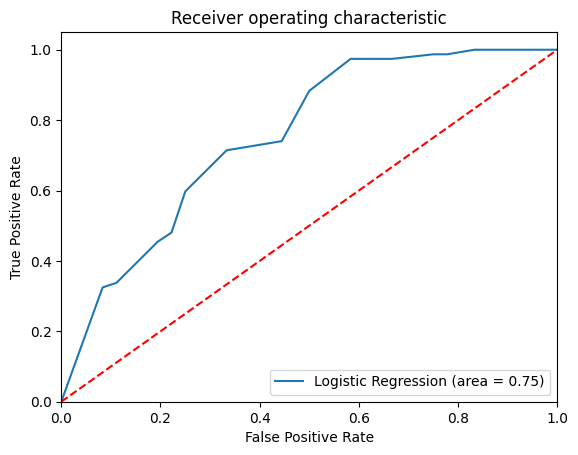

In [ ]:
logit_roc_auc = roc_auc_score(ysc_test, reg.predict_proba(Xsc_test)[:,1])
fpr, tpr, thresholds = roc_curve(ysc_test, reg.predict_proba(Xsc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#calculate log loss
sc_logloss = log_loss(ysc_test, sc_regdata)
sc_logloss

0.49439545799405615

In [ ]:
#calculate score
reg.score(Xscaled, Yscaled)

0.8146167557932263

## 10. Conclusions
- Customers' marriage status, education, credit history, and property area were the most significant variables defining their loan status.
- Standardizing the values had little impact on the precision and recall of the model.
- Model's precision for detecting the yes values of the loan status is high but the recall for no values is low.
- Dropping the columns with non-significant p-value fixed the initial really high log loss value.